In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

In [2]:
df = pd.read_csv('diamonds.csv')
df.head(1)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [3]:
df.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [4]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


In [5]:
df.shape[0]

53940

In [6]:
df.cut.unique().shape[0] + df.clarity.unique().shape[0] + df.color.unique().shape[0]

20

In [7]:
target = 'price'
categorials = ['cut', 'color', 'clarity']
numerical = ['x', 'y', 'z', 'carat', 'depth', 'table', 'price']

<AxesSubplot:>

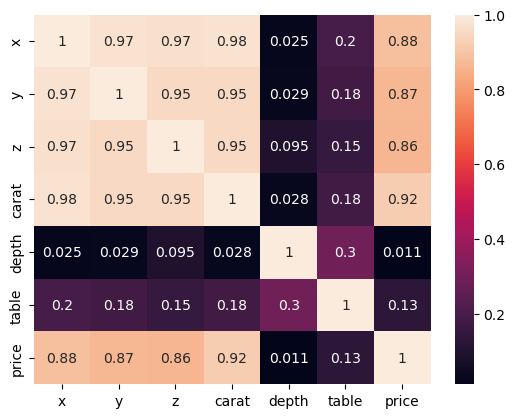

In [8]:
sns.heatmap(np.abs(df[numerical].corr()),annot = True)

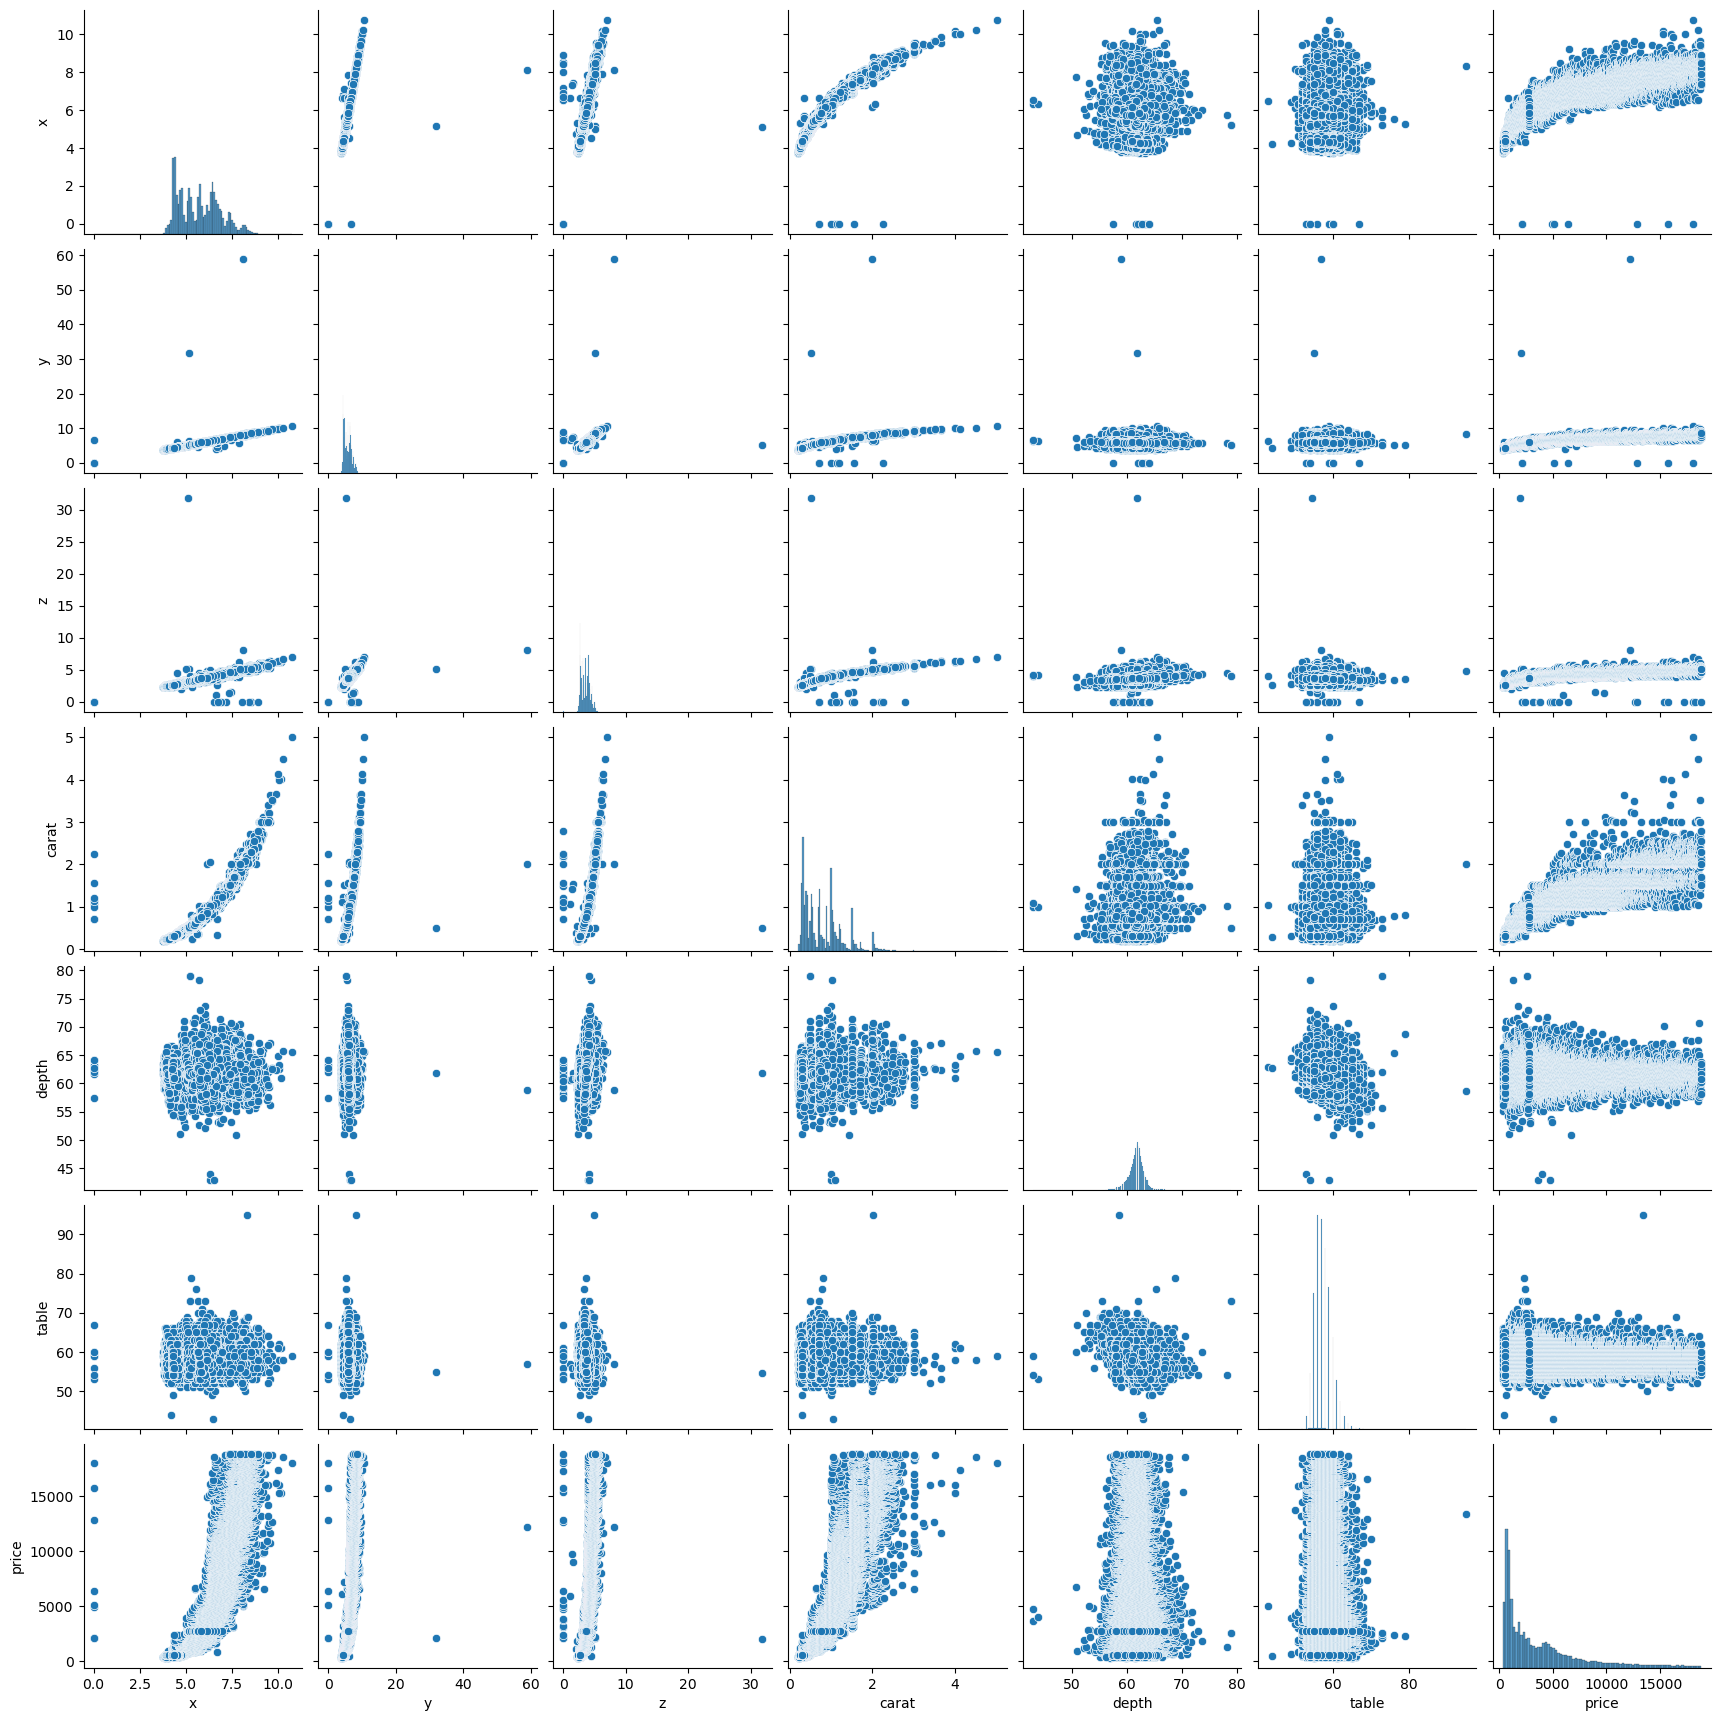

In [9]:
sns.pairplot(df[numerical])

In [10]:
numerical = ['x', 'y', 'z', 'carat', 'depth', 'table']

<AxesSubplot:>

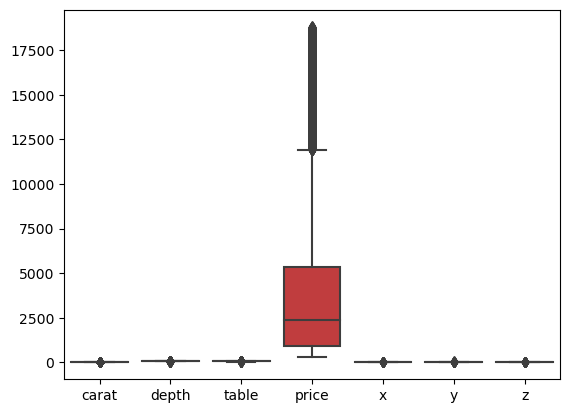

In [11]:
sns.boxplot(data = df)

In [12]:
df[df.price >= df.price.quantile(0.75) + (df.price.quantile(0.75) - df.price.quantile(0.25)) * 1.5].shape[0] / df.shape[0]

0.06562847608453838

In [13]:
df[zscore(df.price) > 3].shape[0] / df.shape[0]

0.02235817575083426

# baseline

In [14]:
dummies = pd.get_dummies(df[categorials])
df_dummies = df.join(dummies)
df_dummies.drop(categorials, axis = 1, inplace = True)
df_dummies

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [18]:
df_dummies.head(1)

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0


In [19]:
x = df_dummies.drop(target, axis = 1)
y = df_dummies[target].to_numpy()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 12)

In [20]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(2)

In [21]:
x_train_poly = poly.fit_transform(x_train.to_numpy()[:, :6])
x_test_poly = poly.fit_transform(x_test.to_numpy()[:, :6])

x_train_poly = np.concatenate([x_train_poly, x_train.to_numpy()[:,6:]], axis = 1)
x_test_poly = np.concatenate([x_test_poly, x_test.to_numpy()[:,6:]], axis = 1)

x_train_poly.shape

(37758, 48)

In [22]:
scaler = StandardScaler()
scaler.fit(x_train.to_numpy()[:,:6])
x_train_sc = scaler.transform(x_train.to_numpy()[:,:6])

x_train_sc = np.concatenate([x_train_sc, x_train.to_numpy()[:,6:]], axis = 1)

scaler = StandardScaler()
scaler.fit(x_test.to_numpy()[:,:6])
x_test_sc = scaler.transform(x_test.to_numpy()[:,:6])

x_test_sc = np.concatenate([x_test_sc, x_test.to_numpy()[:,6:]], axis = 1)

In [23]:
lr1 = LinearRegression()
lr1.fit(x_train, y_train)

lr2 = LinearRegression()
lr2.fit(x_train_sc, y_train)

lr3 = LinearRegression()
lr3.fit(x_train_poly, y_train)

LinearRegression()

In [24]:
lr1.score(x_test, y_test), lr2.score(x_test_sc, y_test), lr3.score(x_test_poly, y_test)

(0.9194867594479159, 0.9192464184797678, 0.8219435697969613)

In [25]:
mape(lr1.predict(x_test), y_test), mape(lr2.predict(x_test_sc), y_test), mape(lr3.predict(x_test_poly), y_test)

(1.1760228394471555, 1.3909165920124424, 1.3656749565669803)

In [26]:
dt1 = DecisionTreeRegressor()
dt1.fit(x_train, y_train)

dt2 = DecisionTreeRegressor()
dt2.fit(x_train_sc, y_train)

dt3 = DecisionTreeRegressor()
dt3.fit(x_train_poly, y_train)

DecisionTreeRegressor()

In [27]:
dt1.score(x_test, y_test), dt2.score(x_test_sc, y_test), dt3.score(x_test_poly, y_test)

(0.9642937944234268, 0.9630357041618444, 0.9631797117332589)

In [28]:
mape(dt1.predict(x_test), y_test), mape(dt2.predict(x_test_sc), y_test), mape(dt3.predict(x_test_poly), y_test)

(0.08678569468103953, 0.09275185466379558, 0.0892036299957584)

In [29]:
from sklearn import linear_model

In [30]:
las1 = linear_model.Lasso(alpha=0.1)
las1.fit(x_train, y_train)

las2 = linear_model.Lasso(alpha=0.1)
las2.fit(x_train_sc, y_train)

las3 = linear_model.Lasso(alpha=0.1)
las3.fit(x_train_poly, y_train)

C:\Users\User\ anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.283e+07, tolerance: 5.963e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\ anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.169e+07, tolerance: 5.963e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\User\ anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.150e+10, toleranc

Lasso(alpha=0.1)

In [31]:
las1.score(x_test, y_test), las2.score(x_test_sc, y_test), las3.score(x_test_poly, y_test)

(0.9194837565101176, 0.9192423846843917, 0.9293187868685806)

In [32]:
mape(las1.predict(x_test), y_test), mape(las2.predict(x_test_sc), y_test), mape(las3.predict(x_test_poly), y_test)

(1.2291603361674612, 1.9103489707641068, 1.4351536325659993)

In [33]:
rid1 = linear_model.Ridge(alpha=0.1)
rid1.fit(x_train, y_train)

rid2 = linear_model.Ridge(alpha=0.1)
rid2.fit(x_train_sc, y_train)

rid3 = linear_model.Ridge(alpha=0.1)
rid3.fit(x_train_poly, y_train)

Ridge(alpha=0.1)

In [34]:
rid1.score(x_test, y_test), rid2.score(x_test_sc, y_test), rid3.score(x_test_poly, y_test)

(0.919486958307608, 0.9192462267251553, 0.8184956248915942)

In [35]:
mape(rid1.predict(x_test), y_test), mape(rid2.predict(x_test_sc), y_test), mape(rid3.predict(x_test_poly), y_test)

(1.1453513927859722, 1.441394870982566, 1.0730769535217417)